### Multivariate linear regression

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
from sklearn.datasets import load_boston

In [114]:
dataset = load_boston()

In [115]:
print(dataset.data.shape)
print(dataset.target.shape)
print(dataset.feature_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [116]:
x = dataset.data
y = dataset.target

In [117]:
N_SAMPLES = x.shape[0]
N_FEATURES = x.shape[1] + 1

#Normalisation    ->Very important to avoid extremely large data
for i in range(x.shape[1]):
    x[:,i] = (x[:,i] - x[:,i].mean())
    x[:,i] /= x[:,i].std()

x = np.append(np.ones((N_SAMPLES,1)),x,axis = 1)
print(x.shape)

(506, 14)


In [121]:
def predict(x,theta):
    return np.dot(x,theta)

def gradient(x,y,theta):
    grad = []
    for i in range(N_FEATURES):
        g = np.mean(((predict(x,theta) - y)*x[:,i].reshape((-1,1))), axis = 0)
        grad.append(g)
    grad = np.array(grad)
    grad = grad.reshape((-1,1))
    return grad

def optimize(x,y,EPOCHS,LEARNING_RATE):
    loss = []
    y = y.reshape((-1,1))
    theta = np.zeros((N_FEATURES,1))
    for itr in range(EPOCHS):
        grad = gradient(x,y,theta)
        dTheta = LEARNING_RATE * grad
        theta -= dTheta
        loss.append(np.mean((y - predict(x,theta))**2, axis = 0))
    return theta,loss
    

In [128]:
theta,loss = optimize(x,y,200,0.05)

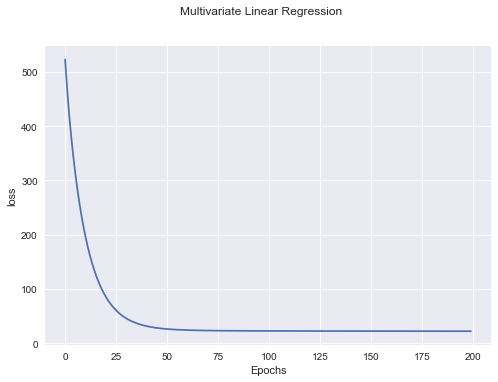

In [129]:
plt.style.use('seaborn')
plt.figure()
plt.suptitle('Multivariate Linear Regression')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)